In [147]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data = pd.read_excel("BTC-USD.xlsx" )
data.info()
data = data[["Date","Open","High","Low","Close","Volume"]]
data['Average_Price'] = data["High"]/4 +  data["Low"]/4 + data["Open"]/4 + data["Close"]/4
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2274 non-null   datetime64[ns]
 1   Open       2274 non-null   float64       
 2   High       2274 non-null   float64       
 3   Low        2274 non-null   float64       
 4   Close      2274 non-null   float64       
 5   Adj Close  2274 non-null   float64       
 6   Volume     2274 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 124.5 KB


,Date,Open,High,Low,Close,Volume,Average_Price
2269,2022-03-19,41794.648438,42316.554688,41602.667969,42190.652344,19664853187,41976.130860
2270,2022-03-20,42191.406250,42241.164063,41004.757813,41247.824219,20127946682,41671.288086
2271,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,24615543271,41111.645508
2272,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,32004652376,41876.475586
2273,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,25242943069,42507.087891


In [149]:
data['Volume'].fillna(value=0, inplace=True)
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
weekly_rows = data

In [150]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Average_Price'].astype(float),
    mode = 'lines',
    name = 'Average Price'
)

layout = dict(
    title='Historical Crypto/Stocks Prices with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2, trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [151]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Volume'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Stocks/Crypto with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [152]:
trace = go.Scattergl(
    y = weekly_rows['Volume'].astype(float),
    x = weekly_rows['High'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='Crypto/Stocks Volume v/s USD',
    xaxis=dict(
        title='Weighted Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume BTC',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compare_webgl')

In [153]:
data = weekly_rows
data = data.groupby([pd.Grouper(key = 'Date')]).first().reset_index()
data = data.set_index('Date')
data = data[['Average_Price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2274 entries, 2016-01-01 to 2022-03-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  2274 non-null   float64
dtypes: float64(1)
memory usage: 35.5 KB


In [154]:
split_date = '2021-04-10'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

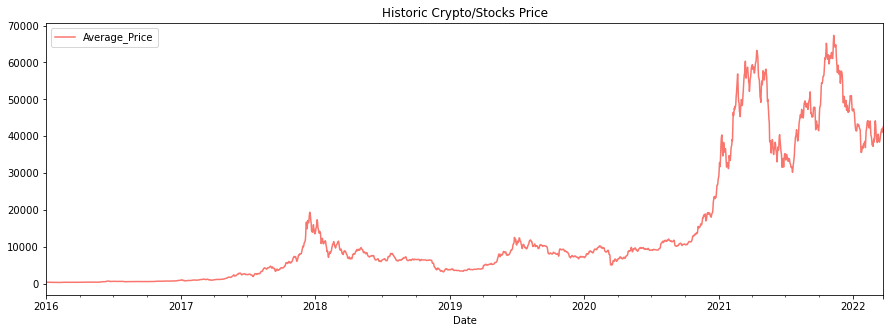

In [155]:
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='Historic Crypto/Stocks Price')

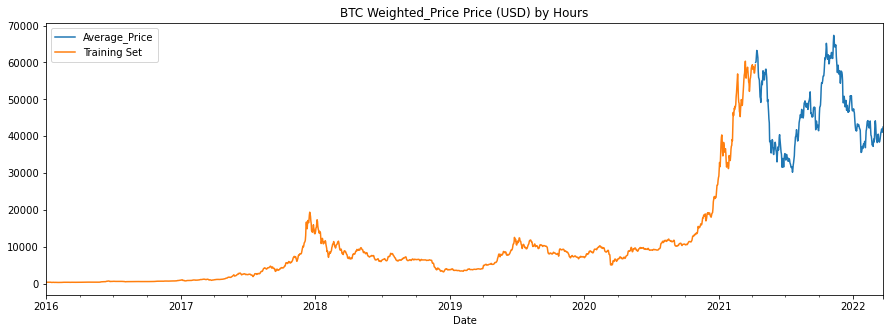

In [156]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(data_train.rename(columns={'Average_Price': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')

In [157]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
39/39 - 1s - loss: 0.0648 - 1s/epoch - 30ms/step
Epoch 2/100
39/39 - 0s - loss: 0.0581 - 100ms/epoch - 3ms/step
Epoch 3/100
39/39 - 0s - loss: 0.0518 - 100ms/epoch - 3ms/step
Epoch 4/100
39/39 - 0s - loss: 0.0437 - 84ms/epoch - 2ms/step
Epoch 5/100
39/39 - 0s - loss: 0.0413 - 84ms/epoch - 2ms/step
Epoch 6/100
39/39 - 0s - loss: 0.0394 - 99ms/epoch - 3ms/step
Epoch 7/100
39/39 - 0s - loss: 0.0351 - 86ms/epoch - 2ms/step
Epoch 8/100
39/39 - 0s - loss: 0.0306 - 104ms/epoch - 3ms/step
Epoch 9/100
39/39 - 0s - loss: 0.0300 - 88ms/epoch - 2ms/step
Epoch 10/100
39/39 - 0s - loss: 0.0262 - 87ms/epoch - 2ms/step
Epoch 11/100
39/39 - 0s - loss: 0.0250 - 84ms/epoch - 2ms/step
Epoch 12/100
39/39 - 0s - loss: 0.0237 - 85ms/epoch - 2ms/step
Epoch 13/100
39/39 - 0s - loss: 0.0223 - 84ms/epoch - 2ms/step
Epoch 14/100
39/39 - 0s - loss: 0.0210 - 83ms/epoch - 2ms/step
Epoch 15/100
39/39 - 0s - loss: 0.0188 - 83ms/epoch - 2ms/step
Epoch 16/100
39/39 - 0s - loss: 0.0179 - 87ms/epoch - 2ms/step

In [158]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [159]:
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = model.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [160]:
data_test['Weighted_Price_Prediction'] = predicted_BTC_price
data_all = pd.concat([data_test, data_train], sort=True)

In [161]:
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'lstm'})
final_data = final_data[['Date','Average_Price','lstm']]

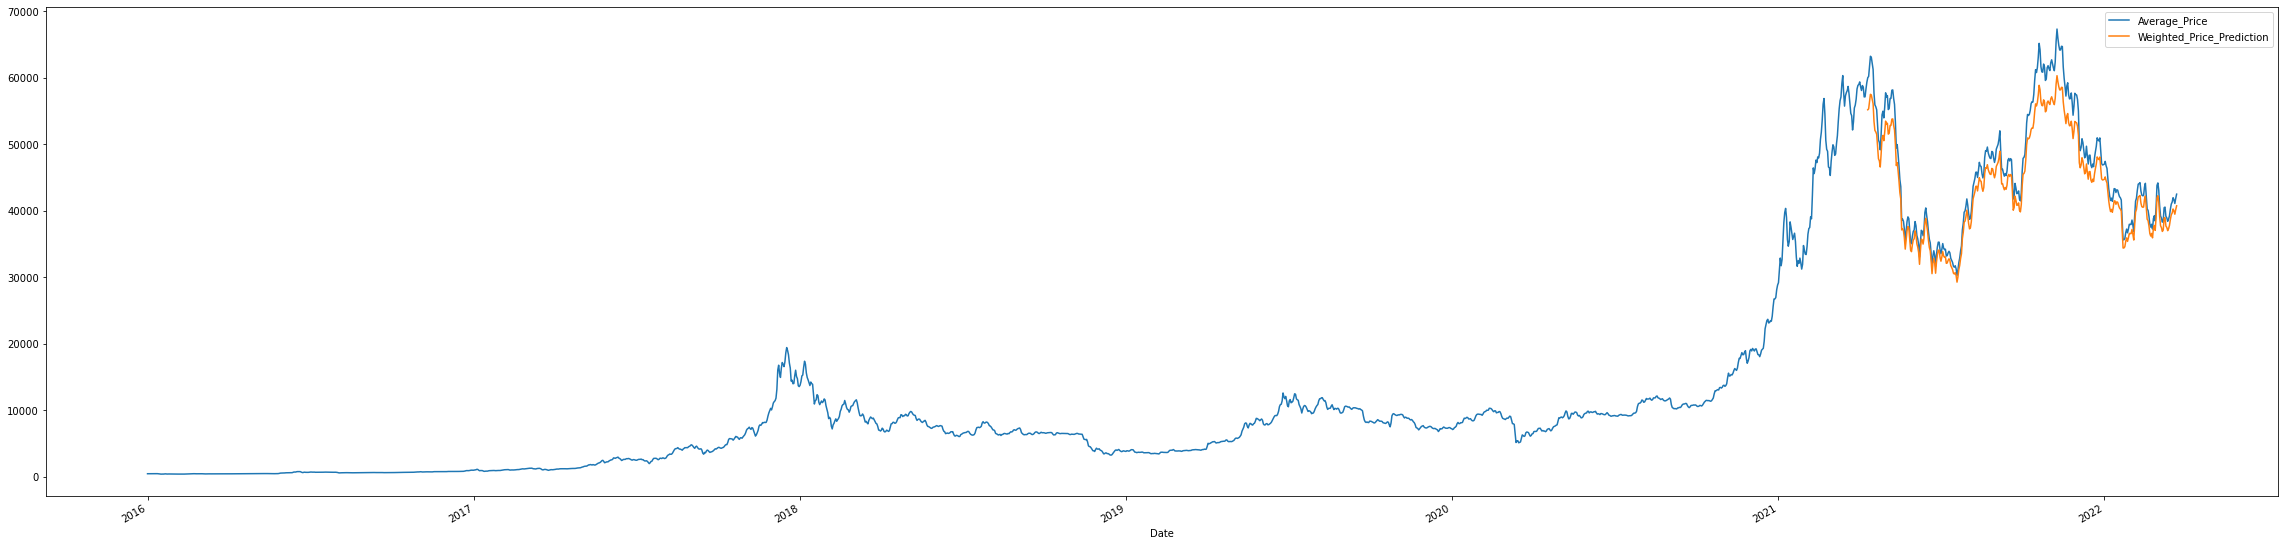

In [162]:
_ = data_all[['Average_Price','Weighted_Price_Prediction']].plot(figsize=(40,10))

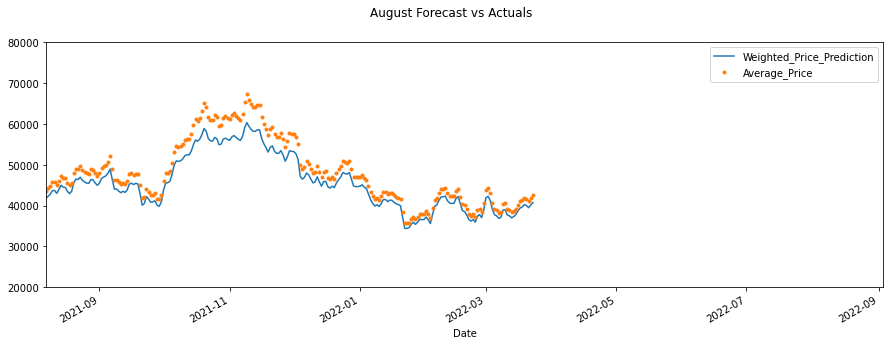

In [163]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Average_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-07-2021', upper='09-03-2022')
ax.set_ylim(20000, 80000)
plot = plt.suptitle('August Forecast vs Actuals')

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Average_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

8225183.917091558

In [165]:
mean_absolute_error(y_true=data_test['Average_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

2503.592921305836

In [166]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X_train, y_train = create_features(data_train, label='Average_Price')
X_test, y_test = create_features(data_test, label='Average_Price')

C:\Users\sanpa\AppData\Local\Temp/ipykernel_7728/3941280673.py:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [167]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) 

[00:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [168]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[00:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=10, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [169]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [170]:
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'Weighted_Price_Prediction': 'xgboost'})
final_data = final_data[['Date','Average_Price','lstm','xgboost']]

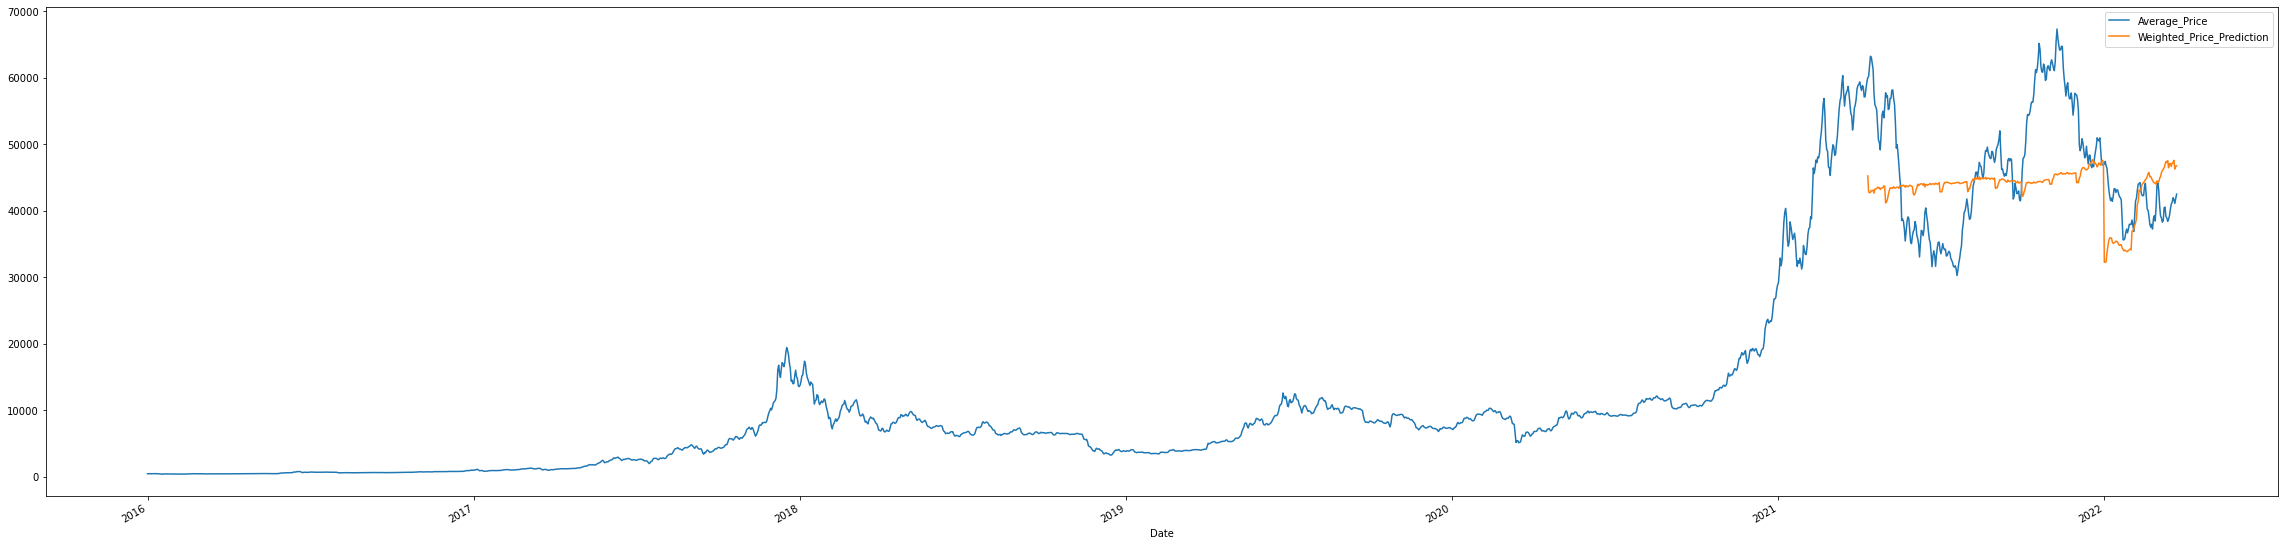

In [171]:
_ = data_all[['Average_Price','Weighted_Price_Prediction']].plot(figsize=(40, 10))

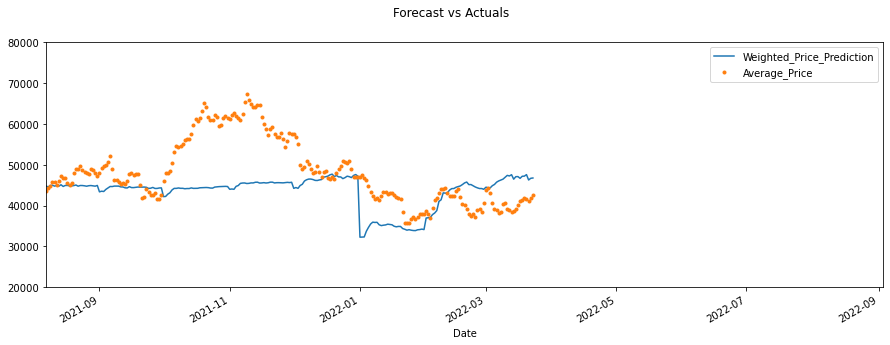

In [172]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Weighted_Price_Prediction','Average_Price']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='08-07-2021', upper='09-03-2022')
ax.set_ylim(20000, 80000)
plot = plt.suptitle('Forecast vs Actuals')

In [173]:
mean_squared_error(y_true=data_test['Average_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

87250108.89530449

In [174]:
mean_absolute_error(y_true=data_test['Average_Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

7616.340818936239

In [175]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

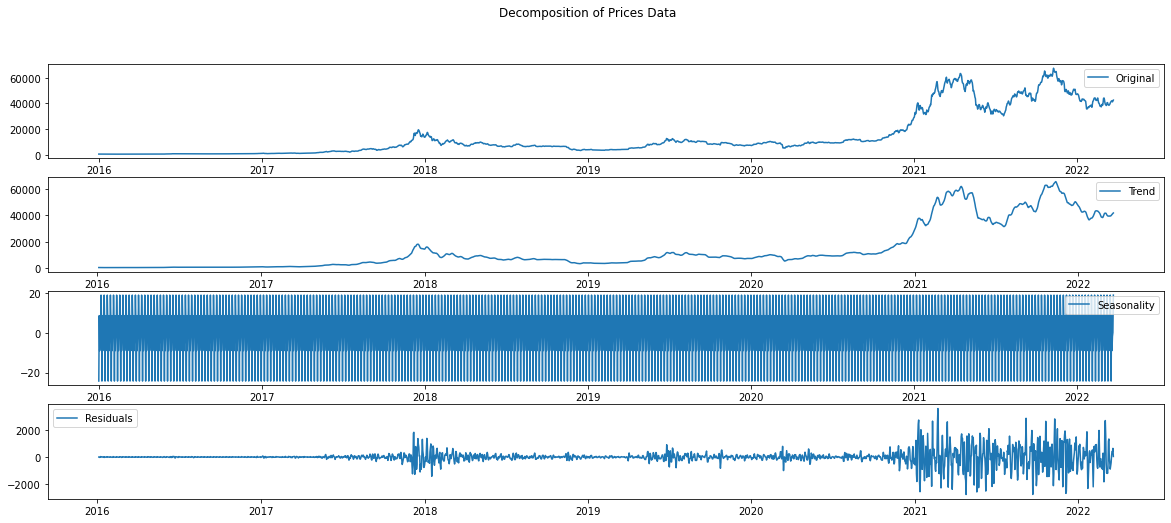

In [176]:
decomposition = sm.tsa.seasonal_decompose(data["Average_Price"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(data["Average_Price"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()